In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/f/Documents/Ironhack/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
#Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
# Calculate the proportion of best-sellers for each category
crosstab_result_sorted = pd.DataFrame(crosstab_result)
crosstab_result_sorted['proportion_best_seller'] = (crosstab_result_sorted[True] / crosstab_result_sorted.sum(axis=1)) * 100

# Sort the categories based on the proportion of best-sellers in descending order
crosstab_result_sorted = crosstab_result_sorted.sort_values(by='proportion_best_seller', ascending=False)

# Display the sorted crosstab table
crosstab_result_sorted


isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [6]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

# p-value of 0.0 indicates that there is assosiation between the two categories. 
# Given the extremely low p-value, we reject the null hypothesis. 
# This implies that there's a significant association between `proportion_best_seller` and `category` in the dataset.


(36540.20270061387, 0.0)

In [7]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

# Value 0.12 indicates weak association between category and best-seller status
# The Cramér's V value of 0.12 suggests a weak association between the two variables. 
# Though statistically significant, the strength of this relationship is not very strong in practical terms.

0.1222829439760564

<Axes: xlabel='category'>

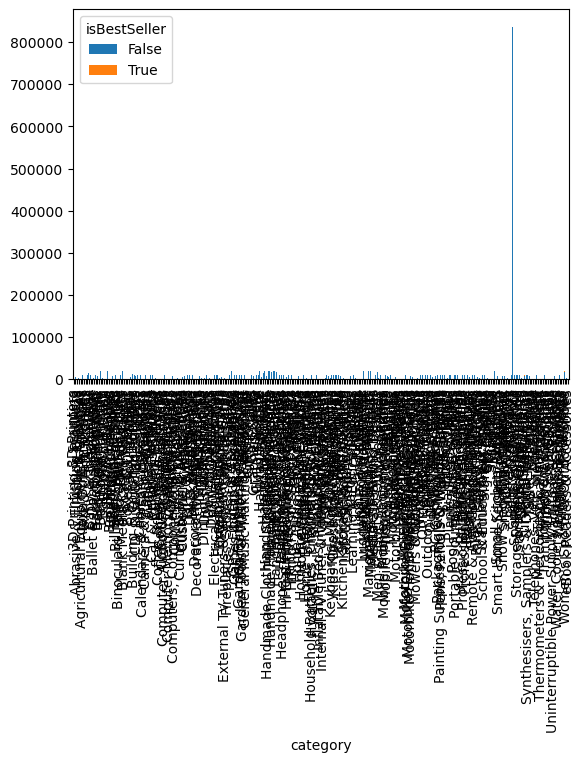

In [8]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

In [9]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
sns.violinplot(data=df, x='MSZoning', y='SalePrice', palette="coolwarm")

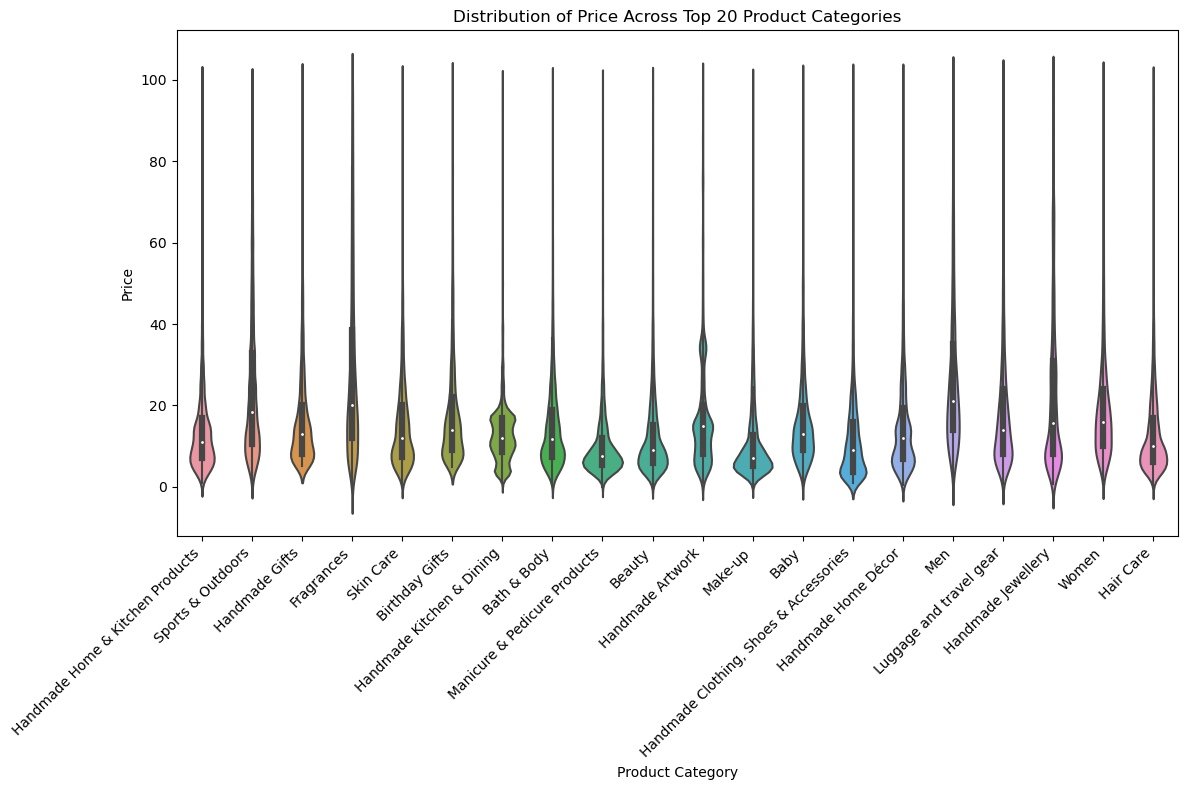

In [11]:
# Step 1: Calculate the count of products in each category
category_counts = df_no_outliers['category'].value_counts()

# Step 2: Select the top 20 categories based on count
top_20_categories = category_counts.head(20).index

# Step 3: Filter the original dataframe to include only the products in these top 20 categories
df_no_outliers_top_20_categories = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Step 4: Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers_top_20_categories)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Calculate the median price for each product category
median_price_by_category = df_no_outliers.groupby('category')['price'].median()

# Find the category with the highest median price
category_with_highest_median_price = median_price_by_category.idxmax()

# Get the highest median price
highest_median_price = median_price_by_category.max()

print("Category with the highest median price:", category_with_highest_median_price)
print("Highest median price:", highest_median_price)


Category with the highest median price: Desktop PCs
Highest median price: 74.0


In [28]:
# Get the top 10 product categories based on count
top10_categories = df_no_outliers['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top10_categories = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]
top10_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

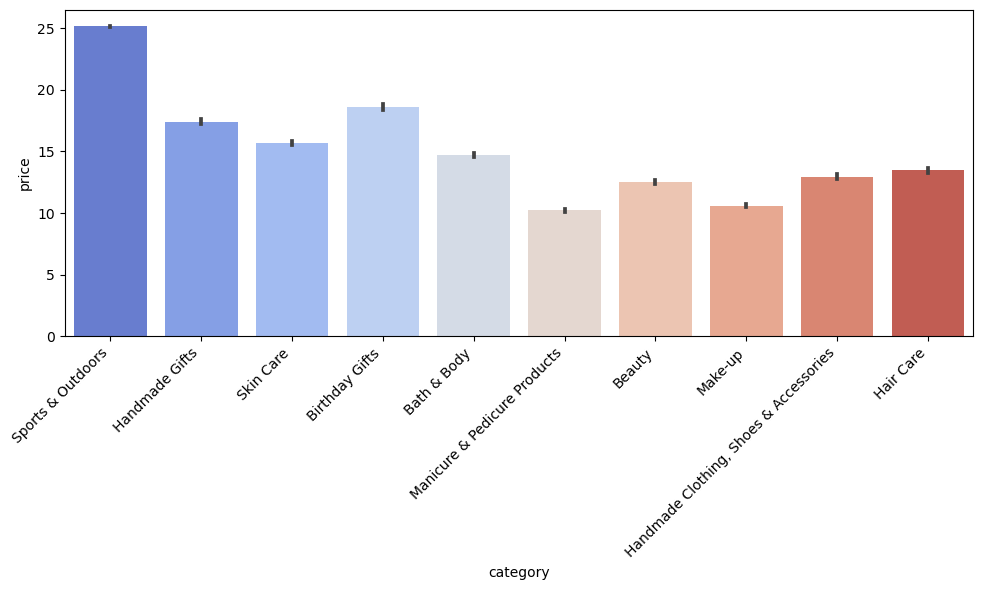

In [36]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_top10_categories, x='category', y='price', palette='coolwarm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and adjust alignment
plt.tight_layout()
plt.show()

In [38]:
# Which product category commands the highest average price? Don't filter here by top categories.
# Group the data by category and calculate the mean price for each category
average_price_by_category = df_no_outliers.groupby('category')['price'].mean()

# Find the category with the highest average price
category_highest_avg_price = average_price_by_category.idxmax()

# Retrieve the highest average price
highest_avg_price = average_price_by_category.max()

print(f"The product category '{category_highest_avg_price}' commands the highest average price of ${highest_avg_price:.2f}.")


The product category 'Motherboards' commands the highest average price of $68.77.


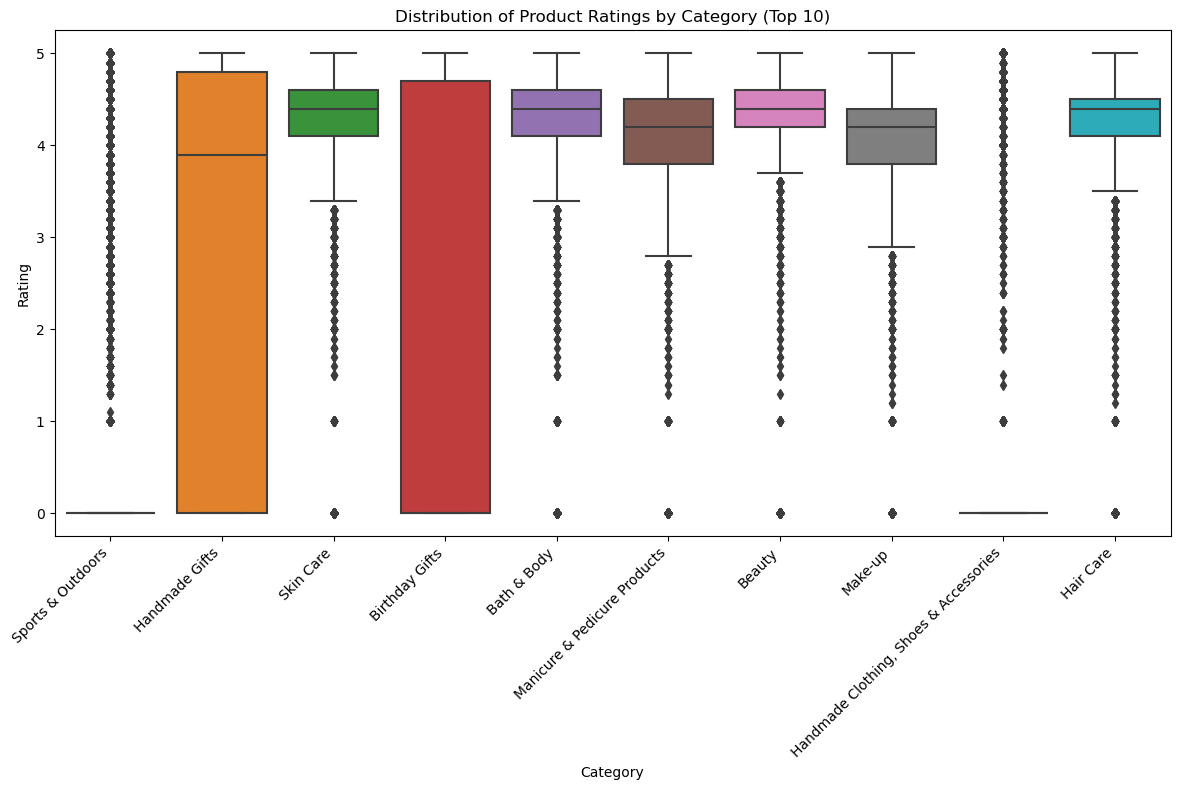

In [41]:
# Filter the dataframe to include only the top 10 categories based on count
top10_categories = df_no_outliers['category'].value_counts().nlargest(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]

# Create side-by-side box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.title('Distribution of Product Ratings by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [48]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Calculate the median rating for each category
median_ratings = df_no_outliers.groupby('category')['stars'].median()

# Find the category with the highest median rating
highest_median_category = median_ratings.idxmax()

# Print the category with the highest median rating
print("Category with the highest median rating:", highest_median_category)


Category with the highest median rating: Computer Memory


In [49]:
# Correlation Coefficients:
# Calculate the correlation coefficient between price and stars
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])

# Print the correlation coefficient
print("Correlation coefficient between price and stars:", correlation_coefficient)

Correlation coefficient between price and stars: -0.07767299878181444


In [50]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_no_outliers['price'], df_no_outliers['stars'])
correlation_coefficient, p_value
#There is a significant correlation between product price and its rating.

(-0.0776729987815233, 0.0)

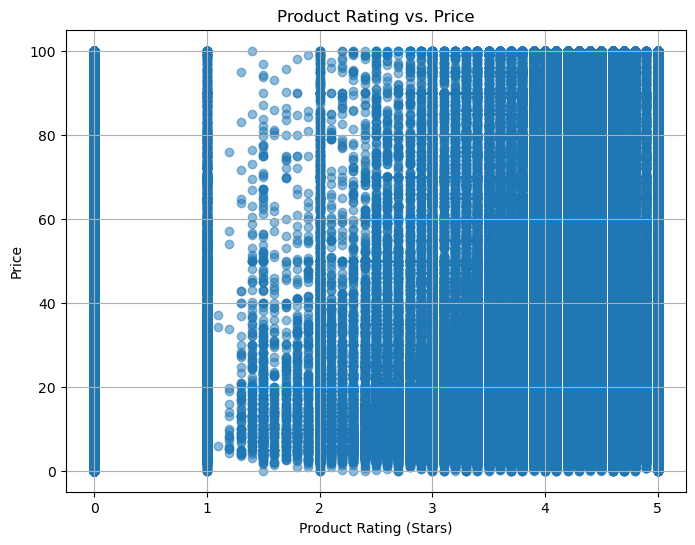

In [51]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Product Rating vs. Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [53]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Checking for numerical variables
df_no_outliers.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2115963
reviews                19136
price                  10000
stars                     42
boughtInLastMonth         25
dtype: int64

In [55]:
df_no_outliers['stars'].unique()
# The result indicates that rating is not a continuous  variable

array([4.7, 4.6, 4.5, 4.8, 4.4, 4.9, 4.3, 3.8, 4.1, 4.2, 3.9, 4. , 3.4,
       3.6, 5. , 3.2, 3.3, 0. , 3.5, 3.7, 3. , 2.7, 1. , 2.5, 2. , 2.9,
       2.8, 3.1, 1.5, 2.2, 2.1, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [56]:
numerical = df_no_outliers.select_dtypes("number").drop([ 'uid'], axis=1)
numerical 

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


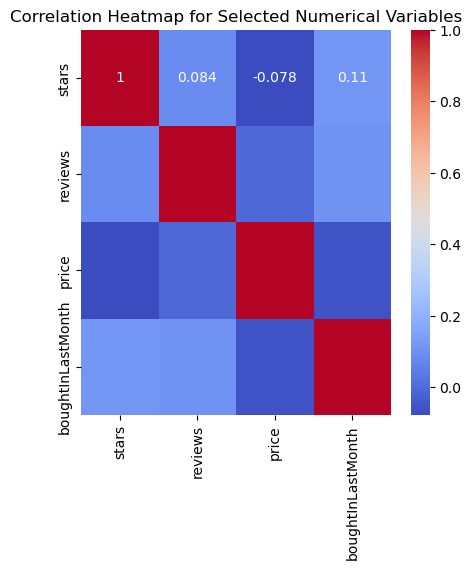

In [57]:
correlation_matrix = numerical.corr()

plt.figure(figsize=(5, 5))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# Heatmap indicates that there is not strong corealtion between numerical variables.

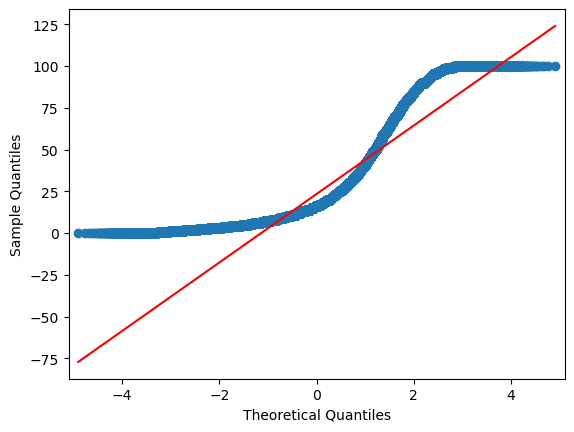

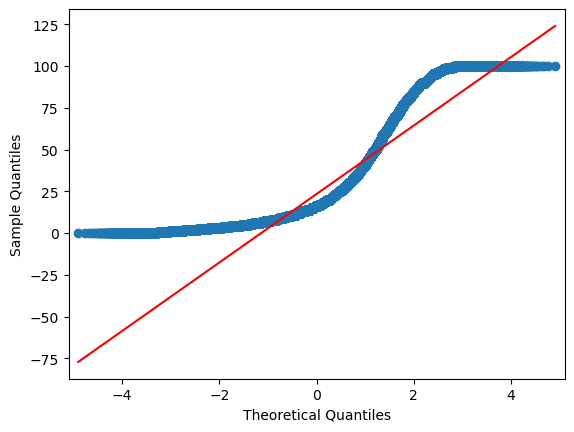

In [59]:
# Examine if product prices typically follow a normal distribution using a QQ plot. 

import statsmodels.api as sm

sm.qqplot(numerical['price'], line='s')

# The distribution of the price do not follow normal distribution